In [395]:
#import libraries
import sys
from os.path import dirname, join as pjoin
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.linalg as la
np.set_printoptions(threshold=1000)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
import time

In [428]:
# Displays the results of the prediction
def display_prediction_results(Y_validation, y_pred):
    #Evaluate Predictions using Accuracy Score and Confusion Matrix
    print('Confusion Matrix: \n', confusion_matrix(Y_validation, y_pred))
    print('\nConfusion matrix for each of the digits from 0 to 9 printed below in order')
    #displays the confusion matrix for each of the digits
    print(multilabel_confusion_matrix(Y_validation, y_pred))
    print('\nAccuracy for each of the digits from 0 to 9 printed below ')
    #the confusion matrix obtained for each of the digits can be used to calculate the accuracy for each digit
    mcm = multilabel_confusion_matrix(Y_validation, y_pred)
    worst_digit =-1
    worst_accuracy = -1
    for i in range(0,10):
        # each of the digits accuracy can be calculated from their respective matrix using the formula
        #((True positive + True negative) / All))
        digit_accuracy = (mcm[i][0][0] +mcm[i][1][1])/(mcm[i][0][0]+ mcm[i][0][1]+mcm[i][1][0] +mcm[i][1][1])
        if worst_accuracy ==-1 or digit_accuracy< worst_accuracy:
            worst_digit=i
            worst_accuracy = digit_accuracy
        print('Accuracy for digit '  , i , ': ' , digit_accuracy)
    
    print('\nDigit with worst accuracy is', worst_digit, '. It has an accuracy score of: ', worst_accuracy)

    print('\nAccuracy Score on the entire Test Data: ',accuracy_score(Y_validation, y_pred))
    print('\nPrecision Score on the entire Test Data: ',precision_score(Y_validation, y_pred, average='macro'))
    print('\nRecall Score on the entire Test Data: ',recall_score(Y_validation, y_pred, average='macro'))

In [442]:
#Displays the decision tree which has been created
def display_tree(classifier):
    #displaying the tree structure
    plt.figure(figsize=(24,10))
    tree.plot_tree(clf, fontsize=12)
    plt.show()
    print('\n')
    #Text representation of the tree to show the entire tree structure
    text_representation = tree.export_text(clf)
    print(text_representation)

In [457]:
#trains the model and returns the time taken to train the model
def train_model(classifier, X_train, Y_train):
    #start the timer
    start = time.perf_counter()
    #Train the test data using Decision tree
    classifier.fit(X_train,Y_train)
    #stop the timer
    stop = time.perf_counter()
    t = stop - start
    return t

In [446]:
#makes predictions on the test data and also returns the time taken for predictions
def predict(classifier, X_validation):
    #start the timer
    start = time.perf_counter()
    #Predicting the test set
    y_pred =  classifier.predict(X_validation)
    #stop the timer
    stop = time.perf_counter()
    t = stop - start
    return y_pred,t

In [396]:
#load usps data into arr
usps_data_dir= "usps_all.mat"
usps_data = sio.loadmat(usps_data_dir)
arr = usps_data['fea']
labels = usps_data['gnd']
arr.shape

(9298, 256)

In [397]:
# Split-out dataset into training and validation
X = arr[:,0:255]
y = labels[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=2007, random_state=1)

In [459]:
#Train the decision tree model
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,max_features=255)
t1 = train_model(clf, X_train, Y_train)
print(f"Time taken for training is {t1:0.4f} seconds")

Time taken for training is 5.4490 seconds


In [460]:
#Predicting labels on the test set for the decision tree
y_pred, t2 = predict(clf, X_validation)
print(f"Time taken for prediction is {t2:0.4f} seconds")

Time taken for prediction is 0.0038 seconds


In [461]:
#displaying the prediction results for the decision tree
display_prediction_results(Y_validation, y_pred)

Confusion Matrix: 
 [[290   0   1  15   1   5   6   0  19   1]
 [  0 262   0   0   1   0   4   3   1   4]
 [  8   0 145   9   6   4   7   0  23   0]
 [  9   0   4 144   1  16   0   0  13   4]
 [  1   2   6   0 131   1   3   2   8  17]
 [  9   1  15  15   2 107   9   0   9   1]
 [  3   0   8   1   0   3 132   0   9   0]
 [  2   0  14   0   9   0   1 143   2  12]
 [  0   0   6  26   7   3   2   1  76  35]
 [  0   2   1   1  10   0   0   5   1 147]]

Confusion matrix for each of the digits from 0 to 9 printed below in order
[[[1637   32]
  [  48  290]]

 [[1727    5]
  [  13  262]]

 [[1750   55]
  [  57  145]]

 [[1749   67]
  [  47  144]]

 [[1799   37]
  [  40  131]]

 [[1807   32]
  [  61  107]]

 [[1819   32]
  [  24  132]]

 [[1813   11]
  [  40  143]]

 [[1766   85]
  [  80   76]]

 [[1766   74]
  [  20  147]]]

Accuracy for each of the digits from 0 to 9 printed below 
Accuracy for digit  0 :  0.9601395117090185
Accuracy for digit  1 :  0.9910313901345291
Accuracy for digit  2 :  

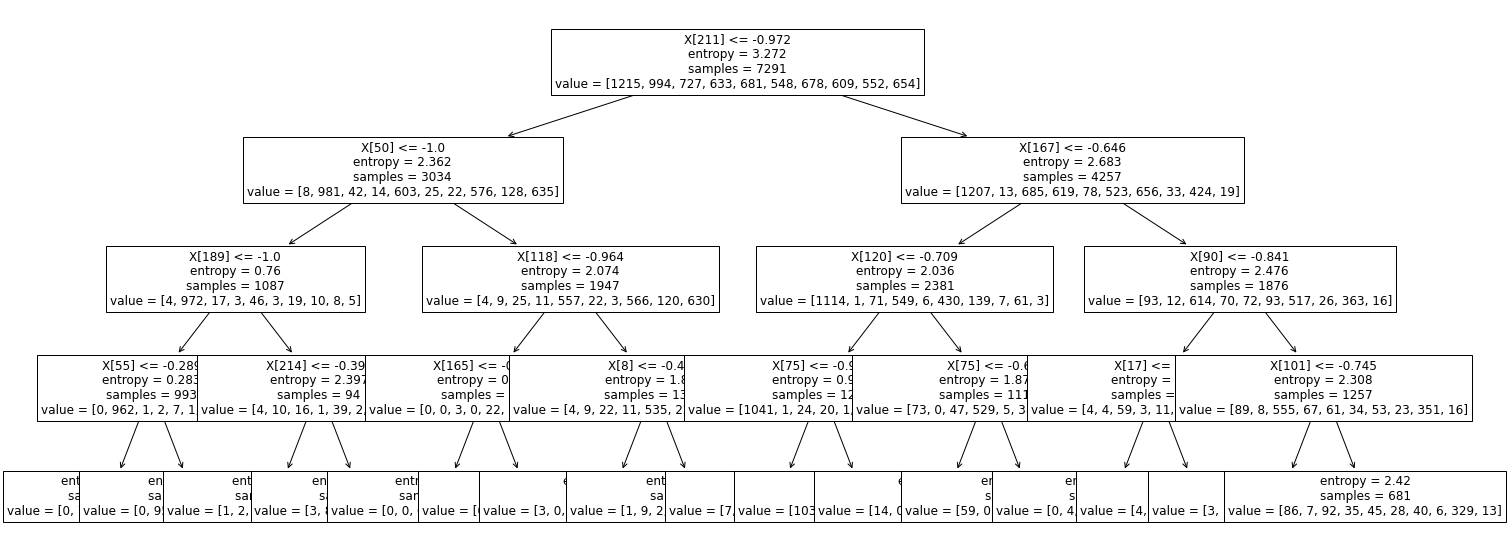



|--- feature_211 <= -0.97
|   |--- feature_50 <= -1.00
|   |   |--- feature_189 <= -1.00
|   |   |   |--- feature_55 <= -0.29
|   |   |   |   |--- class: 8
|   |   |   |--- feature_55 >  -0.29
|   |   |   |   |--- class: 2
|   |   |--- feature_189 >  -1.00
|   |   |   |--- feature_214 <= -0.40
|   |   |   |   |--- class: 5
|   |   |   |--- feature_214 >  -0.40
|   |   |   |   |--- class: 7
|   |--- feature_50 >  -1.00
|   |   |--- feature_118 <= -0.96
|   |   |   |--- feature_165 <= -0.84
|   |   |   |   |--- class: 8
|   |   |   |--- feature_165 >  -0.84
|   |   |   |   |--- class: 5
|   |   |--- feature_118 >  -0.96
|   |   |   |--- feature_8 <= -0.42
|   |   |   |   |--- class: 5
|   |   |   |--- feature_8 >  -0.42
|   |   |   |   |--- class: 10
|--- feature_211 >  -0.97
|   |--- feature_167 <= -0.65
|   |   |--- feature_120 <= -0.71
|   |   |   |--- feature_75 <= -0.94
|   |   |   |   |--- class: 7
|   |   |   |--- feature_75 >  -0.94
|   |   |   |   |--- class: 1
|   |   |--- fe

In [443]:
#displaying the tree structure
display_tree(clf)

In [477]:
#Train the KNN model - 1st
neigh = KNeighborsClassifier(n_neighbors=1, weights='distance')
t1 = train_model(neigh, X_train, Y_train)
print(f"Time taken for training is {t1:0.4f} seconds")

Time taken for training is 1.0110 seconds


In [478]:
#Predicting labels on the test set for the KNN model - 1st
y_pred, t2 = predict(neigh, X_validation)
print(f"Time taken for prediction is {t2:0.4f} seconds")

Time taken for prediction is 9.1781 seconds


In [ ]:
#displaying the prediction results for the KNN - 1st
display_prediction_results(Y_validation, y_pred)

In [479]:
#Train the KNN model - 2nd
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
t1 = train_model(neigh, X_train, Y_train)
print(f"Time taken for training is {t1:0.4f} seconds")

Time taken for training is 0.8194 seconds


In [480]:
#Predicting labels on the test set for the KNN model - 2nd
y_pred, t2 = predict(neigh, X_validation)
print(f"Time taken for prediction is {t2:0.4f} seconds")

Time taken for prediction is 10.1437 seconds


In [ ]:
#displaying the prediction results for the KNN - 2nd
display_prediction_results(Y_validation, y_pred)

In [487]:
#Train the KNN model - 3rd
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
t1 = train_model(neigh, X_train, Y_train)
print(f"Time taken for training is {t1:0.4f} seconds")

Time taken for training is 0.8367 seconds


In [488]:
#Predicting labels on the test set for the KNN model - 3rd
y_pred, t2 = predict(neigh, X_validation)
print(f"Time taken for prediction is {t2:0.4f} seconds")

Time taken for prediction is 10.4279 seconds


In [489]:
#displaying the prediction results for the KNN - 3rd
display_prediction_results(Y_validation, y_pred)

Confusion Matrix: 
 [[334   0   1   2   0   0   0   0   0   1]
 [  0 271   0   0   1   0   1   1   0   1]
 [  2   0 197   1   0   0   1   1   0   0]
 [  0   0   0 179   0   7   0   0   3   2]
 [  0   0   1   0 158   0   2   1   0   9]
 [  2   0   1   0   0 161   1   0   2   1]
 [  1   0   1   0   0   0 154   0   0   0]
 [  0   1   0   0   2   0   0 178   0   2]
 [  0   1   0   2   0   2   0   1 148   2]
 [  0   0   0   0   2   0   0   3   0 162]]

Confusion matrix for each of the digits from 0 to 9 printed below in order
[[[1664    5]
  [   4  334]]

 [[1730    2]
  [   4  271]]

 [[1801    4]
  [   5  197]]

 [[1811    5]
  [  12  179]]

 [[1831    5]
  [  13  158]]

 [[1830    9]
  [   7  161]]

 [[1846    5]
  [   2  154]]

 [[1817    7]
  [   5  178]]

 [[1846    5]
  [   8  148]]

 [[1822   18]
  [   5  162]]]

Accuracy for each of the digits from 0 to 9 printed below 
Accuracy for digit  0 :  0.9955156950672646
Accuracy for digit  1 :  0.9970104633781763
Accuracy for digit  2 :  

In [484]:
#Train the KNN model - 4th
neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform')
t1 = train_model(neigh, X_train, Y_train)
print(f"Time taken for training is {t1:0.4f} seconds")

Time taken for training is 0.8270 seconds


In [485]:
#Predicting labels on the test set for the KNN model - 4th
y_pred, t2 = predict(neigh, X_validation)
print(f"Time taken for prediction is {t2:0.4f} seconds")

Time taken for prediction is 11.3567 seconds


In [486]:
#displaying the prediction results for the KNN - 4th
display_prediction_results(Y_validation, y_pred)

Confusion Matrix: 
 [[334   0   1   2   0   0   0   0   0   1]
 [  0 271   0   0   1   0   1   1   0   1]
 [  2   0 197   1   0   0   1   1   0   0]
 [  0   0   0 179   0   7   0   0   3   2]
 [  0   0   1   0 158   0   2   1   0   9]
 [  2   0   1   1   0 160   1   0   2   1]
 [  1   0   1   0   0   0 154   0   0   0]
 [  0   1   0   0   2   0   0 178   0   2]
 [  0   1   1   3   0   2   0   1 146   2]
 [  0   0   0   0   2   0   0   3   0 162]]

Confusion matrix for each of the digits from 0 to 9 printed below in order
[[[1664    5]
  [   4  334]]

 [[1730    2]
  [   4  271]]

 [[1800    5]
  [   5  197]]

 [[1809    7]
  [  12  179]]

 [[1831    5]
  [  13  158]]

 [[1830    9]
  [   8  160]]

 [[1846    5]
  [   2  154]]

 [[1817    7]
  [   5  178]]

 [[1846    5]
  [  10  146]]

 [[1822   18]
  [   5  162]]]

Accuracy for each of the digits from 0 to 9 printed below 
Accuracy for digit  0 :  0.9955156950672646
Accuracy for digit  1 :  0.9970104633781763
Accuracy for digit  2 :  

In [ ]:
#displaying the prediction results for the KNN
display_prediction_results(Y_validation, y_pred)

In [437]:
#Train the Support Vector Machine model
clm = SVC(kernel='linear', decision_function_shape='ovr')
t1 = train_model(clm, X_train, Y_train)
print(f"Time taken for training is {t1:0.4f} seconds")

Time taken for training is 5.5181 seconds


In [438]:
#Predicting labels on the test set for the SVM
y_pred, t2 = predict(clm, X_validation)
print(f"Time taken for prediction is {t2:0.4f} seconds")

Time taken for prediction is 1.6154 seconds


In [434]:
#displaying the prediction results for the SVM
display_prediction_results(Y_validation, y_pred)

Confusion Matrix: 
 [[338   0   0   0   0   0   0   0   0   0]
 [  0 274   0   0   0   0   1   0   0   0]
 [  0   0 202   0   0   0   0   0   0   0]
 [  0   0   0 189   0   1   0   0   1   0]
 [  0   0   0   0 171   0   0   0   0   0]
 [  0   0   0   0   0 168   0   0   0   0]
 [  0   0   0   0   0   0 156   0   0   0]
 [  0   0   0   0   0   0   0 183   0   0]
 [  0   0   0   1   0   0   0   1 154   0]
 [  0   0   0   0   0   0   0   1   0 166]]

Confusion matrix for each of the digits from 0 to 9 printed below in order
[[[1669    0]
  [   0  338]]

 [[1732    0]
  [   1  274]]

 [[1805    0]
  [   0  202]]

 [[1815    1]
  [   2  189]]

 [[1836    0]
  [   0  171]]

 [[1838    1]
  [   0  168]]

 [[1850    1]
  [   0  156]]

 [[1822    2]
  [   0  183]]

 [[1850    1]
  [   2  154]]

 [[1840    0]
  [   1  166]]]

Accuracy for each of the digits from 0 to 9 printed below 
Accuracy for digit  0 :  1.0
Accuracy for digit  1 :  0.9995017438963627
Accuracy for digit  2 :  1.0
Accuracy fo

In [439]:
#Train the Support Vector Machine model
clm = SVC(kernel='poly', decision_function_shape='ovr')
t1 = train_model(clm, X_train, Y_train)
print(f"Time taken for training is {t1:0.4f} seconds")

Time taken for training is 6.1814 seconds


In [440]:
#Predicting labels on the test set for the SVM
y_pred, t2 = predict(clm, X_validation)
print(f"Time taken for prediction is {t2:0.4f} seconds")

Time taken for prediction is 1.8950 seconds


In [ ]:
#displaying the prediction results for the SVM
display_prediction_results(Y_validation, y_pred)